In [10]:
import torch
import torch.nn as nn
import torch.utils.data
from torchvision import datasets, transforms
import torch.nn.functional as F
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from functools import reduce
import operator
from PIL import Image

device = torch.device('cpu')

In [39]:
def prod(iterable):
    return reduce(operator.mul, iterable, 1)

def make_sun():
    size = 28
    xx, yy = np.meshgrid(np.arange(size)-(size-1)/2.,np.arange(size)-(size-1)/2)
    r = np.sqrt(xx*xx+yy*yy) 
    rad = np.random.rand(1)*(size/3)
    image = np.exp(-(r*r)/(rad*rad))*(rad**rad_power)
    return image

def make_sun_multi_channel(num_channels=5):
    size = 28
    xx, yy = np.meshgrid(np.arange(size)-(size-1)/2.,np.arange(size)-(size-1)/2)
    r = np.sqrt(xx*xx+yy*yy) 
    rad = np.random.rand(1)*(size/3)
    channels = []
    for c in range(num_channels):
        randintensity = np.random.rand(1)*10.0 * c
        channels.append(np.exp(-(r*r)/(rad*rad))*randintensity)
    image = torch.cat([torch.from_numpy(channel).float().to(device) for channel in channels]).view(num_channels, 28, 28)
    return image

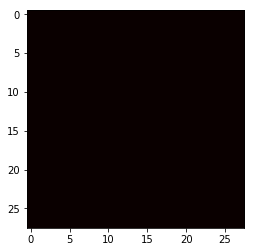

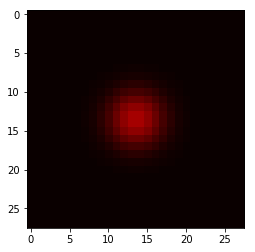

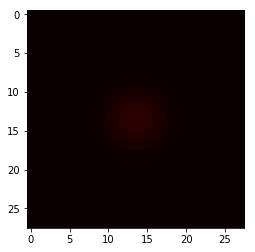

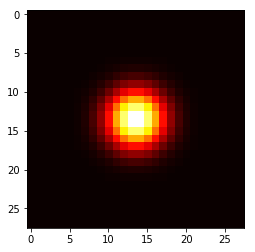

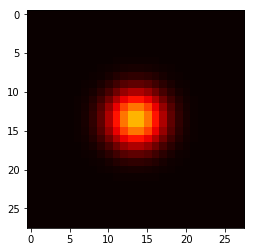

In [40]:
sun = make_sun_multi_channel()
sun_numpy = sun.numpy()

for channel in sun_numpy:
    plt.imshow(channel, norm=None, cmap='hot', vmin=sun_numpy.min(), vmax=sun_numpy.max())
    plt.show()


In [41]:
class NetCNN(nn.Module):
    def __init__(self, input_shape, output_dim):
        super().__init__()
        if (len(input_shape) != 3):
            raise ValueError('Expecting an input_shape representing dimensions CxHxW')
        self._input_channels = input_shape[0]
        print('input_channels: {}'.format(self._input_channels))
        self._conv2d1 = nn.Conv2d(in_channels=self._input_channels, out_channels=64, kernel_size=3)
        self._conv2d2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)
        self._cnn_output_dim = self._cnn(torch.zeros(input_shape).unsqueeze(0)).nelement()
        print('cnn_output_dim: {}'.format(self._cnn_output_dim))
        self._fc1 = nn.Linear(self._cnn_output_dim, 256)
        self._fc2 = nn.Linear(256, output_dim)
        
    def _cnn(self, x):
        x = self._conv2d1(x)
        x = torch.relu(x)
        x = nn.MaxPool2d(kernel_size=3)(x)
        x = self._conv2d2(x)
        x = nn.MaxPool2d(kernel_size=3)(x)
        return x
    
    
    def forward(self, x):
        batch_dim = x.shape[0]
        x = self._cnn(x).view(batch_dim, -1)
        x = self._fc1(x)
        x = torch.relu(x)
        x = self._fc2(x)
        x = torch.sigmoid(x)
        return x
    
class NetFF(nn.Module):
    def __init__(self, input_shape, output_dim):
        super().__init__()
        if (len(input_shape) != 3):
            raise ValueError('Expecting an input_shape representing dimensions CxHxW')
        self._input_channels = input_shape[0]
        print('input_channels: {}'.format(self._input_channels))
        self._input_dim = prod(input_shape)
        print('input_dim: {}'.format(self._input_dim))
        self._fc1 = nn.Linear(self._input_dim, 64)
        self._fc2 = nn.Linear(64, output_dim)
        
    def forward(self, x):
        x = x.view(-1, self._input_dim)
        x = self._fc1(x)
        x = torch.relu(x)
        x = self._fc2(x)
        x = torch.sigmoid(x)
        return x

input_channels: 5
cnn_output_dim: 512
Current loss: 0.10888790339231491
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9863669872283936, dimming (predicted): 0.4743530750274658


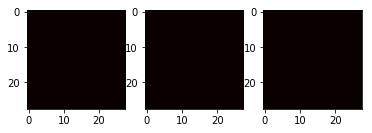

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.10793524980545044, dimming (predicted): 0.5374965071678162


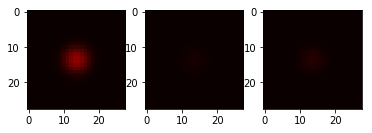

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.01782691478729248, dimming (predicted): 0.5604249238967896


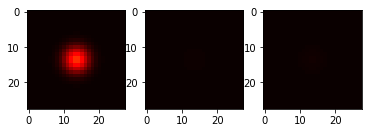

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8151851892471313, dimming (predicted): 0.46070656180381775


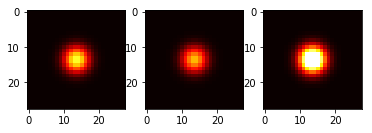

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.6195824146270752, dimming (predicted): 0.5596823692321777


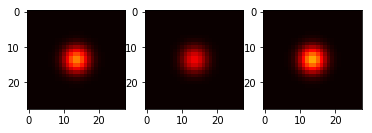

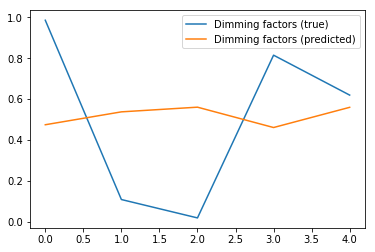

Current loss: 0.0700809434056282
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.4225764870643616, dimming (predicted): 0.45138540863990784


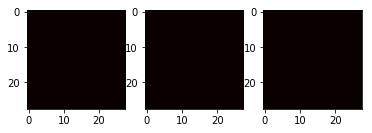

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9610820412635803, dimming (predicted): 0.609338104724884


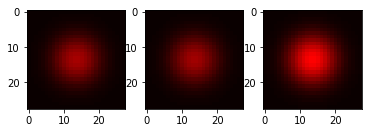

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8951442837715149, dimming (predicted): 0.46847474575042725


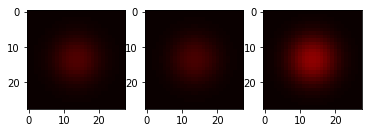

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.10408055782318115, dimming (predicted): 0.3515755236148834


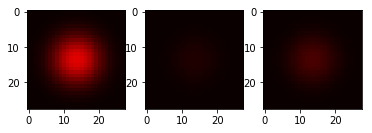

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.2360820174217224, dimming (predicted): 0.6806263327598572


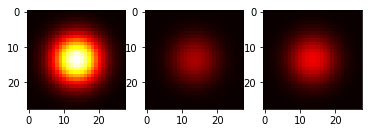

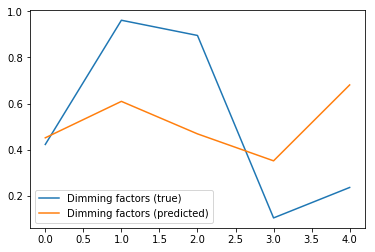

Current loss: 0.06300976872444153
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5368390679359436, dimming (predicted): 0.5181990265846252


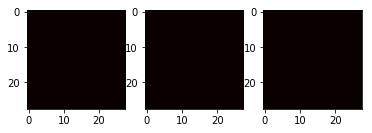

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.07125043869018555, dimming (predicted): 0.5121968984603882


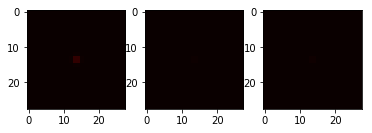

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.31322401762008667, dimming (predicted): 0.47729194164276123


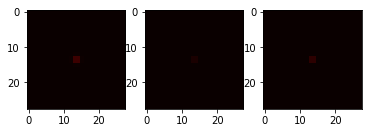

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.3776431679725647, dimming (predicted): 0.5104344487190247


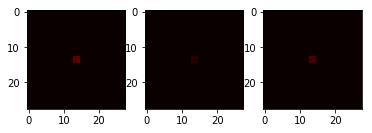

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.06715548038482666, dimming (predicted): 0.49305692315101624


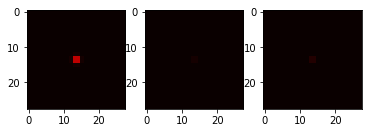

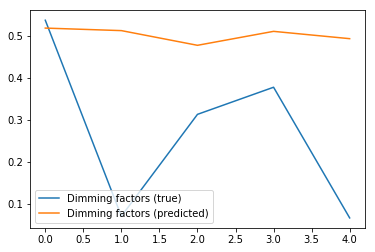

Current loss: 0.07569169253110886
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.3954463005065918, dimming (predicted): 0.5360024571418762


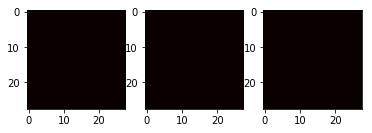

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.6634376049041748, dimming (predicted): 0.43773603439331055


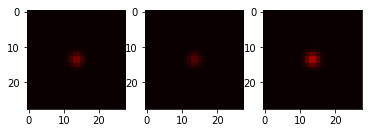

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.13773715496063232, dimming (predicted): 0.5902795791625977


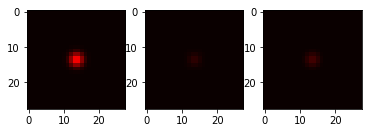

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.6801673173904419, dimming (predicted): 0.7424816489219666


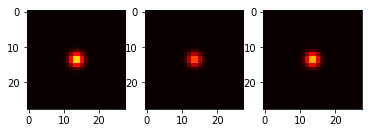

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.14324545860290527, dimming (predicted): 0.29876184463500977


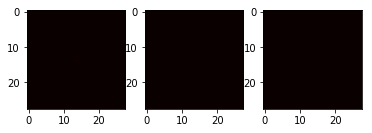

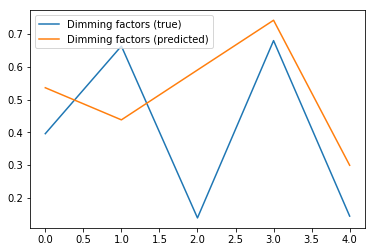

Current loss: 0.10430892556905746
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.3826397657394409, dimming (predicted): 0.4895232915878296


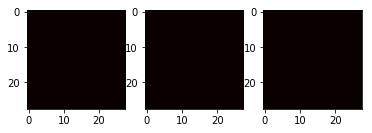

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.04093056917190552, dimming (predicted): 0.4915018677711487


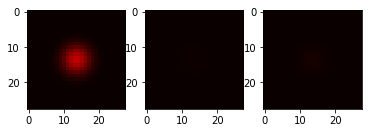

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8044130802154541, dimming (predicted): 0.47187453508377075


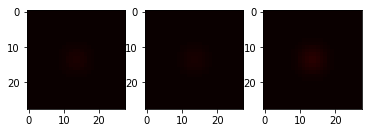

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8026567697525024, dimming (predicted): 0.4741750955581665


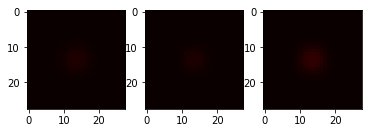

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5391734838485718, dimming (predicted): 0.5460174679756165


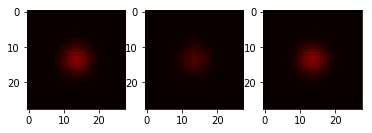

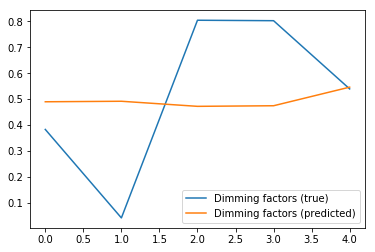

Current loss: 0.0904712826013565
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.20625025033950806, dimming (predicted): 0.5026087760925293


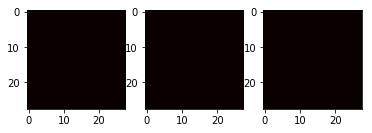

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.7849569916725159, dimming (predicted): 0.540687084197998


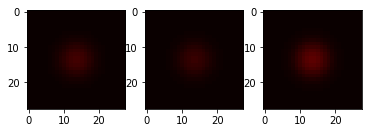

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.10881108045578003, dimming (predicted): 0.47694966197013855


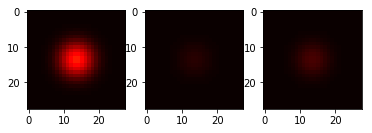

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.07193583250045776, dimming (predicted): 0.4249347448348999


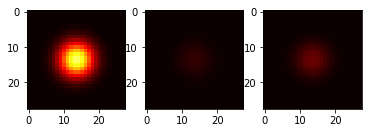

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9690907597541809, dimming (predicted): 0.5362731218338013


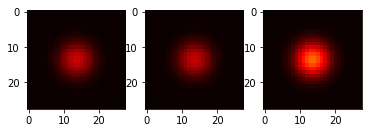

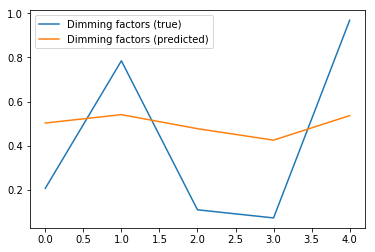

Current loss: 0.08437228947877884
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.737738311290741, dimming (predicted): 0.5125899910926819


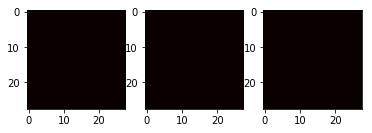

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.021146833896636963, dimming (predicted): 0.48945724964141846


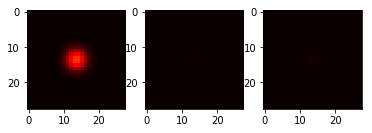

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8273234367370605, dimming (predicted): 0.5377036929130554


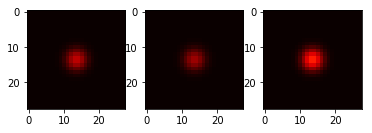

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8750885725021362, dimming (predicted): 0.5113525986671448


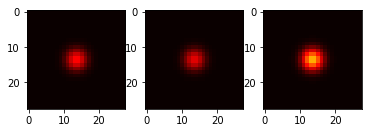

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.6859341263771057, dimming (predicted): 0.5178214311599731


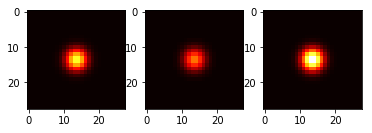

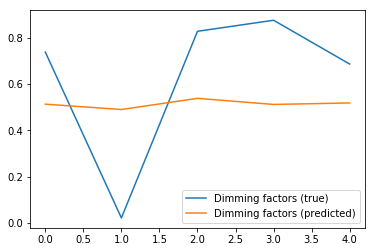

Current loss: 0.09845604747533798
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.6786243915557861, dimming (predicted): 0.4255942404270172


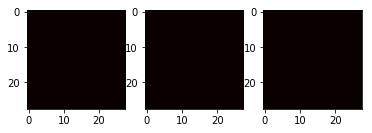

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.19044184684753418, dimming (predicted): 0.3094863295555115


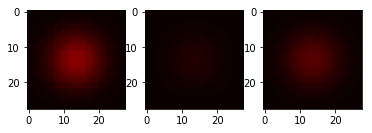

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9277799129486084, dimming (predicted): 0.9121657013893127


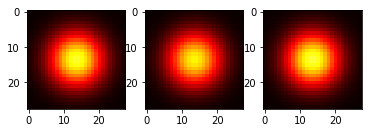

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.7128440737724304, dimming (predicted): 0.23995234072208405


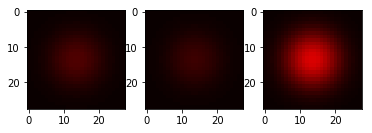

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9166901111602783, dimming (predicted): 0.36394721269607544


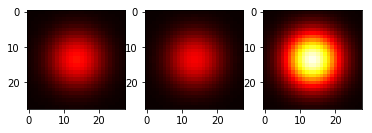

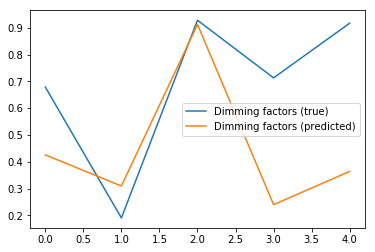

Current loss: 0.08939243108034134
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.2601361870765686, dimming (predicted): 0.5185593366622925


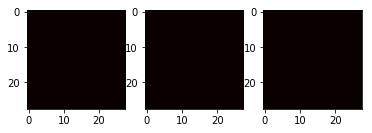

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.1511116623878479, dimming (predicted): 0.4224308133125305


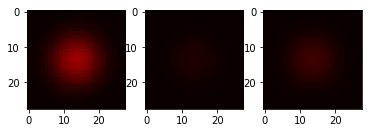

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.37037432193756104, dimming (predicted): 0.4743342101573944


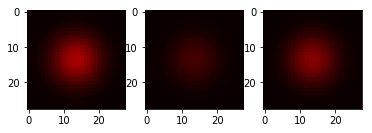

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.982133150100708, dimming (predicted): 0.6086062788963318


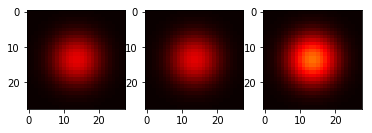

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.42935967445373535, dimming (predicted): 0.6400848031044006


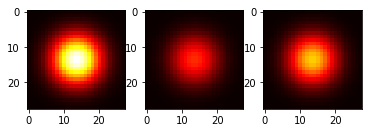

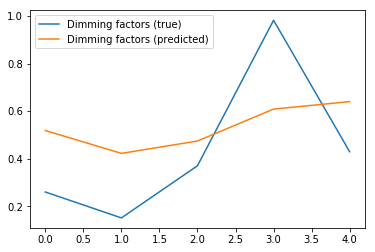

Current loss: 0.0643269419670105
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9083804488182068, dimming (predicted): 0.5212963223457336


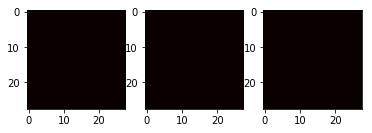

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.12251359224319458, dimming (predicted): 0.5095786452293396


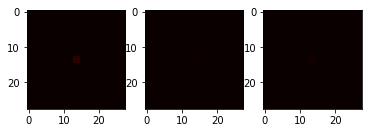

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.29752910137176514, dimming (predicted): 0.4889433681964874


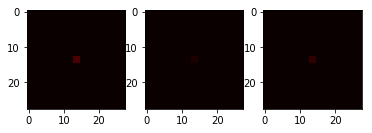

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.4781585931777954, dimming (predicted): 0.5060684680938721


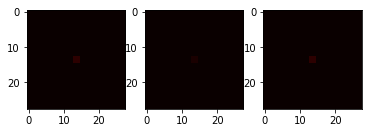

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.23322057723999023, dimming (predicted): 0.4651414155960083


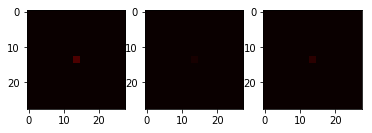

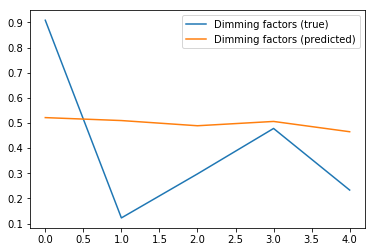

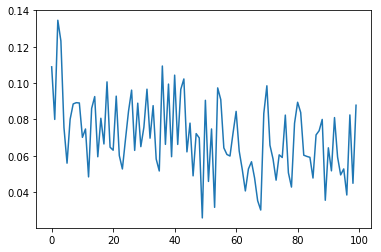

Loss min: 0.02575390785932541, max: 0.13452254235744476, mean: 0.07049449665471912


In [44]:
num_channels = 5
batch_size = 4

model = NetCNN(input_shape=[num_channels, 28, 28], output_dim=num_channels)
model.train()
optimizer = torch.optim.Adam(model.parameters())

losses = []
for b in range(100):
    data = torch.cat([make_sun_multi_channel(num_channels=num_channels) for i in range(batch_size)]).view(batch_size, num_channels, 28, 28)
    data_min, data_max = torch.min(data), torch.max(data)
    dim_factors = torch.rand(batch_size, num_channels).view(batch_size,-1).to(device)
#     print(batch.shape)
#     print(dim_factors.shape)
    dimmed_data = data.clone().to(device)
    for i in range(batch_size):
        for j in range(num_channels):
            dimmed_data[i, j] *= dim_factors[i, j]

    optimizer.zero_grad()
    output = model(dimmed_data)
    loss = nn.MSELoss()(output, dim_factors)
    loss.backward()
    optimizer.step()
    losses.append(float(loss))
    
    if b % 10 == 0:
        print('Current loss: {}'.format(float(loss)))
        sample = data[0].numpy()
        sample_dimmed = dimmed_data[0].numpy()

        for i, (channel, channel_dimmed) in enumerate(zip(sample, sample_dimmed)):
            fig = plt.figure()
            ax1 = fig.add_subplot(1, 3, 1)
            ax1.imshow(channel, norm=None, cmap='hot', vmin=data_min, vmax=data_max)
            ax2 = fig.add_subplot(1, 3, 2)
            ax2.imshow(channel_dimmed, norm=None, cmap='hot', vmin=data_min, vmax=data_max)
            ax3 = fig.add_subplot(1, 3, 3)
            ax3.imshow(channel_dimmed / float(output[0, i]), norm=None, cmap='hot', vmin=data_min, vmax=data_max)
            print('Channel: {} (left: original, middle: dimmed, right: undimmed)\nDimming (true): {}, dimming (predicted): {}'.format(i, dim_factors[0, i], output[0, i]))
            plt.show()
        dim_factors_numpy = dim_factors[0].view(-1).cpu().numpy()
        plt.plot(dim_factors_numpy, label='Dimming factors (true)')
        output_numpy = output[0].detach().view(-1).cpu().numpy()
        plt.plot(output_numpy, label='Dimming factors (predicted)')
        plt.legend()
        plt.show()

plt.plot(losses, label='training loss')
plt.show()
print('Loss min: {}, max: {}, mean: {}'.format(min(losses), max(losses), np.mean(losses)))